In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.shape


(5172, 3002)

In [5]:
df.dtypes

,0
Email No.,object
the,int64
to,int64
ect,int64
and,int64
...,...
military,int64
allowing,int64
ff,int64
dry,int64


In [6]:
df.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [7]:
df["Prediction"].value_counts()

,count
Prediction,
0,3672
1,1500


In [8]:
df.drop(columns="Email No.", inplace=True)

In [9]:
df.Prediction.unique()

array([0, 1])

In [10]:
df['Prediction'] = df['Prediction'].replace({0:'Not spam', 1:'Spam'})

In [11]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Not spam
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,Not spam
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,Not spam
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,Not spam
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,Not spam


# KNN

In [35]:
X = df.drop(columns='Prediction')
Y = df['Prediction']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [37]:
KN = KNeighborsClassifier
knn = KN(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
y_pred = knn.predict(x_test)
print(y_pred)

['Not spam' 'Spam' 'Not spam' ... 'Not spam' 'Not spam' 'Not spam']


In [39]:
M = accuracy_score(y_test,y_pred)
print("KNN accuracy: ", M)

KNN accuracy:  0.8714975845410629


In [40]:
C =confusion_matrix(y_test,y_pred)
print("Confusion matrix: ", C)

Confusion matrix:  [[635  84]
 [ 49 267]]


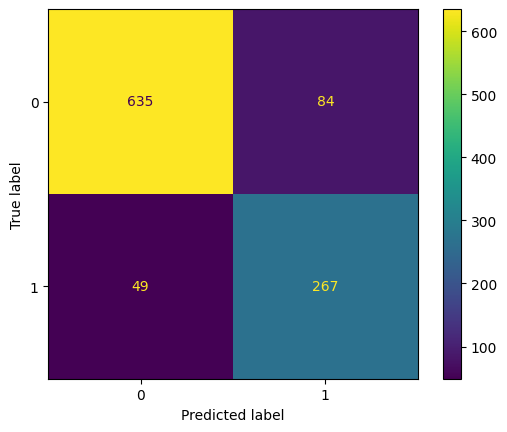

In [41]:
#sns.heatmap(C, annot = True, fmt = 'g')
cm=ConfusionMatrixDisplay(confusion_matrix=C)
cm.plot()

In [42]:
print("KNN Classification report")
print(classification_report(y_test, y_pred))

KNN Classification report
              precision    recall  f1-score   support

    Not spam       0.93      0.88      0.91       719
        Spam       0.76      0.84      0.80       316

    accuracy                           0.87      1035
   macro avg       0.84      0.86      0.85      1035
weighted avg       0.88      0.87      0.87      1035



# SVM

In [43]:
svm = SVC(kernel = 'linear')



In [44]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [45]:
y_pred_svm = svm.predict(x_test)

In [46]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("KNN Accuracy : ", svm_accuracy)

KNN Accuracy :  0.9507246376811594


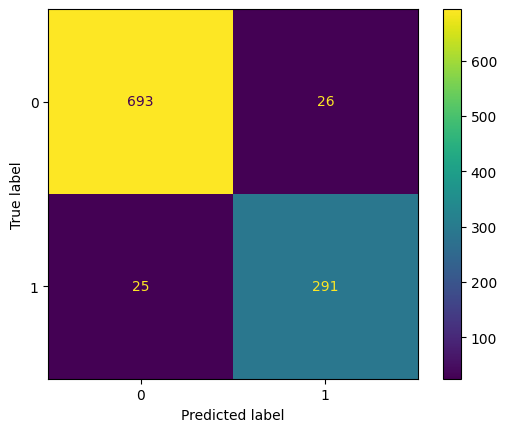

In [47]:
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_cm_display = ConfusionMatrixDisplay(confusion_matrix = svm_cm)
svm_cm_display.plot()

In [48]:
svm_report = classification_report(y_test, y_pred_svm)
print("KNN report : ")
print(svm_report)

KNN report : 
              precision    recall  f1-score   support

    Not spam       0.97      0.96      0.96       719
        Spam       0.92      0.92      0.92       316

    accuracy                           0.95      1035
   macro avg       0.94      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035

